## Постановка задачи:

Требуется анализировать данные ЭКГ в норме и при сердечной аритмии и разработать способ определения аритмии.
Массив данных представляет из себя из себя отрезок измерений за 50 секунд в норме и за 50 секунд до начала фибрилляции желудочков, эти данные были выбраны с 23-х электродов, сигналы с которых были достаточно четкие для анализа. Измерения проводились раз в миллисекунду, а напряжения с электродов измерялись в микровольтах.

Установливаем библиотеку Pandas:

In [1]:
! pip install pandas

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Импортируем необходимые модули:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Знакомимся с dataset-ом

Считываем dataset и, для наглядности, выводим его содержимое. Сначала считываем данные в норме:

In [3]:
data_normal1 = pd.read_csv("normal1.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['A1(X)',	'A1(Y)',	'A2(X)',	'A2(Y)',	'A3(X)',	'A3(Y)',	'B3(X)',	'B3(Y)',	'B2(X)',	'B2(Y)'])

Каждый столбец X убираем, так как каждая строка соответсвует отдельному моменту времени, числовые значения которых мы не будем использовать

In [4]:
data_normal1 = data_normal1.drop(labels=["A1(X)", "A2(X)", "A3(X)", "B3(X)", "B2(X)"], axis=1)
data_normal1

,A1(Y),A2(Y),A3(Y),B3(Y),B2(Y)
0,-3982.5,-3900.0,-3737.5,-3670.0,-3847.5
1,-3902.5,-3747.5,-3650.0,-3615.0,-3712.5
2,-3752.5,-3527.5,-3530.0,-3450.0,-3565.0
3,-3582.5,-3422.5,-3452.5,-3380.0,-3470.0
4,-3477.5,-3212.5,-3355.0,-3310.0,-3342.5
...,...,...,...,...,...
49909,-4327.5,-4132.5,-4365.0,-4610.0,-4822.5
49910,-4260.0,-4210.0,-4355.0,-4575.0,-4897.5
49911,-4315.0,-4310.0,-4370.0,-4592.5,-4935.0
49912,-4190.0,-4372.5,-4335.0,-4520.0,-4910.0


In [5]:
data_normal2 = pd.read_csv("normal2.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['D1(X)',	'D1(Y)',	'D3(X)',	'D3(Y)',	'D4(X)',	'D4(Y)',	'C3(X)',	'C3(Y)',	'C2(X)',	'C2(Y)'])

In [6]:
data_normal2 = data_normal2.drop(labels=["D1(X)", "D3(X)", "D4(X)", "C3(X)", "C2(X)"], axis=1)
data_normal2

,D1(Y),D3(Y),D4(Y),C3(Y),C2(Y)
0,-4372.5,-3652.5,-1090.0,-3520.0,-3970.0
1,-4242.5,-3465.0,-995.0,-3382.5,-3830.0
2,-3875.0,-3280.0,-960.0,-3260.0,-3620.0
3,-3530.0,-3110.0,-922.5,-3162.5,-3417.5
4,-3320.0,-2897.5,-830.0,-3062.5,-3310.0
...,...,...,...,...,...
49909,-5552.5,-4512.5,-1902.5,-4052.5,-4562.5
49910,-5547.5,-4550.0,-1895.0,-4055.0,-4642.5
49911,-5702.5,-4610.0,-1882.5,-4082.5,-4740.0
49912,-5690.0,-4587.5,-1870.0,-4145.0,-4727.5


In [7]:
data_normal3 = pd.read_csv("normal3.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['E2(X)',	'E2(Y)',	'E3(X)',	'E3(Y)',	'E4(X)',	'E4(Y)',	'F1(X)',	'F1(Y)',	'F3(X)',	'F3(Y)'])

In [8]:
data_normal3 = data_normal3.drop(labels=["E2(X)", "E3(X)", "E4(X)", "F1(X)", "F3(X)"], axis=1)
data_normal3

,E2(Y),E3(Y),E4(Y),F1(Y),F3(Y)
0,-3872.5,-3440.0,-3407.5,-4485.0,-3490.0
1,-3810.0,-3332.5,-3335.0,-4405.0,-3412.5
2,-3560.0,-3155.0,-3217.5,-4167.5,-3235.0
3,-3355.0,-3080.0,-2947.5,-4165.0,-3120.0
4,-3285.0,-2957.5,-2862.5,-3907.5,-2975.0
...,...,...,...,...,...
49909,-4832.5,-4612.5,-4467.5,-5070.0,-5245.0
49910,-4927.5,-4662.5,-4455.0,-5135.0,-5262.5
49911,-5020.0,-4727.5,-4455.0,-5135.0,-5325.0
49912,-5002.5,-4730.0,-4495.0,-5105.0,-5347.5


In [9]:
data_normal4 = pd.read_csv("normal4.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['F4(X)',	'F4(Y)',	'F5(X)',	'F5(Y)',	'G3(X)',	'G3(Y)',	'G2(X)',	'G2(Y)'])

In [10]:
data_normal4 = data_normal4.drop(labels=["F4(X)", "F5(X)", "G3(X)", "G2(X)"], axis=1)
data_normal4

,F4(Y),F5(Y),G3(Y),G2(Y)
0,-3640.0,-3560.0,-3277.5,-3672.5
1,-3565.0,-3445.0,-3145.0,-3540.0
2,-3410.0,-3342.5,-3045.0,-3347.5
3,-3305.0,-3262.5,-2830.0,-3157.5
4,-3265.0,-3200.0,-2787.5,-3040.0
...,...,...,...,...
49909,-4792.5,-3647.5,-4200.0,-4847.5
49910,-4742.5,-3662.5,-4272.5,-4887.5
49911,-4800.0,-3677.5,-4227.5,-4950.0
49912,-4737.5,-3627.5,-4172.5,-4992.5


In [11]:
data_normal5 = pd.read_csv("normal5.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['H2(X)',	'H2(Y)',	'H3(X)',	'H3(Y)',	'H4(X)',	'H4(Y)',	'J3(X)',	'J3(Y)'])

In [12]:
data_normal5 = data_normal5.drop(labels=["H2(X)", "H3(X)", "H4(X)", "J3(X)"], axis=1)
data_normal5

,H2(Y),H3(Y),H4(Y),J3(Y)
0,-3795.0,-3410.0,-3490.0,-3830.0
1,-3707.5,-3340.0,-3412.5,-3715.0
2,-3530.0,-3165.0,-3302.5,-3607.5
3,-3302.5,-2912.5,-3195.0,-3447.5
4,-3172.5,-2682.5,-3072.5,-3295.0
...,...,...,...,...
49909,-4537.5,-4750.0,-4810.0,-4270.0
49910,-4592.5,-4792.5,-4780.0,-4285.0
49911,-4735.0,-4870.0,-4800.0,-4280.0
49912,-4670.0,-4910.0,-4797.5,-4317.5


Соединяем все фрагменты и получаем целый массив данных для нормы.

In [13]:
data_normal = pd.concat([data_normal1, data_normal2, data_normal3, data_normal4, data_normal5], axis=1)

Переименуем все столбцы:

In [14]:
new_columns = []
for i in range(len(data_normal.columns)):
    new_columns.append(data_normal.columns[i][:2])
data_normal.columns = new_columns

In [15]:
data_normal

,A1,A2,A3,B3,B2,D1,D3,D4,C3,C2,...,F1,F3,F4,F5,G3,G2,H2,H3,H4,J3
0,-3982.5,-3900.0,-3737.5,-3670.0,-3847.5,-4372.5,-3652.5,-1090.0,-3520.0,-3970.0,...,-4485.0,-3490.0,-3640.0,-3560.0,-3277.5,-3672.5,-3795.0,-3410.0,-3490.0,-3830.0
1,-3902.5,-3747.5,-3650.0,-3615.0,-3712.5,-4242.5,-3465.0,-995.0,-3382.5,-3830.0,...,-4405.0,-3412.5,-3565.0,-3445.0,-3145.0,-3540.0,-3707.5,-3340.0,-3412.5,-3715.0
2,-3752.5,-3527.5,-3530.0,-3450.0,-3565.0,-3875.0,-3280.0,-960.0,-3260.0,-3620.0,...,-4167.5,-3235.0,-3410.0,-3342.5,-3045.0,-3347.5,-3530.0,-3165.0,-3302.5,-3607.5
3,-3582.5,-3422.5,-3452.5,-3380.0,-3470.0,-3530.0,-3110.0,-922.5,-3162.5,-3417.5,...,-4165.0,-3120.0,-3305.0,-3262.5,-2830.0,-3157.5,-3302.5,-2912.5,-3195.0,-3447.5
4,-3477.5,-3212.5,-3355.0,-3310.0,-3342.5,-3320.0,-2897.5,-830.0,-3062.5,-3310.0,...,-3907.5,-2975.0,-3265.0,-3200.0,-2787.5,-3040.0,-3172.5,-2682.5,-3072.5,-3295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49909,-4327.5,-4132.5,-4365.0,-4610.0,-4822.5,-5552.5,-4512.5,-1902.5,-4052.5,-4562.5,...,-5070.0,-5245.0,-4792.5,-3647.5,-4200.0,-4847.5,-4537.5,-4750.0,-4810.0,-4270.0
49910,-4260.0,-4210.0,-4355.0,-4575.0,-4897.5,-5547.5,-4550.0,-1895.0,-4055.0,-4642.5,...,-5135.0,-5262.5,-4742.5,-3662.5,-4272.5,-4887.5,-4592.5,-4792.5,-4780.0,-4285.0
49911,-4315.0,-4310.0,-4370.0,-4592.5,-4935.0,-5702.5,-4610.0,-1882.5,-4082.5,-4740.0,...,-5135.0,-5325.0,-4800.0,-3677.5,-4227.5,-4950.0,-4735.0,-4870.0,-4800.0,-4280.0
49912,-4190.0,-4372.5,-4335.0,-4520.0,-4910.0,-5690.0,-4587.5,-1870.0,-4145.0,-4727.5,...,-5105.0,-5347.5,-4737.5,-3627.5,-4172.5,-4992.5,-4670.0,-4910.0,-4797.5,-4317.5


Теперь считываем данные при аритмии:

In [16]:
data_arrhythmia1 = pd.read_csv("arrhythmia1.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['A1(X)',	'A1(Y)',	'A2(X)',	'A2(Y)',	'A3(X)',	'A3(Y)',	'B3(X)',	'B3(Y)',	'B2(X)',	'B2(Y)'])

In [17]:
data_arrhythmia1 = data_arrhythmia1.drop(labels=["A1(X)", "A2(X)", "A3(X)", "B3(X)", "B2(X)"], axis=1)
data_arrhythmia1

,A1(Y),A2(Y),A3(Y),B3(Y),B2(Y)
0,-6845.0,-6980.0,-4762.5,-4380.0,-3685.0
1,-6705.0,-6972.5,-4702.5,-4185.0,-3632.5
2,-6572.5,-6777.5,-4647.5,-4135.0,-3525.0
3,-6407.5,-6605.0,-4570.0,-4060.0,-3450.0
4,-6305.0,-6422.5,-4472.5,-3922.5,-3360.0
...,...,...,...,...,...
49909,-2362.5,-3145.0,-2355.0,-1822.5,-2140.0
49910,-2260.0,-3067.5,-2360.0,-1720.0,-2145.0
49911,-2200.0,-3002.5,-2347.5,-1690.0,-2142.5
49912,-2215.0,-2815.0,-2327.5,-1587.5,-2140.0


In [18]:
data_arrhythmia2 = pd.read_csv("arrhythmia2.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['D1(X)',	'D1(Y)',	'D3(X)',	'D3(Y)',	'D4(X)',	'D4(Y)',	'C3(X)',	'C3(Y)',	'C2(X)',	'C2(Y)'])

In [19]:
data_arrhythmia2 = data_arrhythmia2.drop(labels=["D1(X)", "D3(X)", "D4(X)", "C3(X)", "C2(X)"], axis=1)
data_arrhythmia2

,D1(Y),D3(Y),D4(Y),C3(Y),C2(Y)
0,-9185.0,-6132.5,-4737.5,-6427.5,-577.5
1,-8950.0,-5912.5,-4510.0,-6290.0,-535.0
2,-8722.5,-5860.0,-4312.5,-6195.0,-525.0
3,-8540.0,-5687.5,-4160.0,-5957.5,-490.0
4,-8377.5,-5582.5,-3860.0,-5830.0,-512.5
...,...,...,...,...,...
49909,-3112.5,-3177.5,-2602.5,-3392.5,-477.5
49910,-3000.0,-3137.5,-2350.0,-3270.0,-445.0
49911,-2820.0,-3200.0,-2247.5,-3162.5,-472.5
49912,-2702.5,-3147.5,-2157.5,-3137.5,-447.5


In [20]:
data_arrhythmia3 = pd.read_csv("arrhythmia3.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['E2(X)',	'E2(Y)',	'E3(X)',	'E3(Y)',	'E4(X)',	'E4(Y)',	'F1(X)',	'F1(Y)',	'F3(X)',	'F3(Y)'])

In [21]:
data_arrhythmia3 = data_arrhythmia3.drop(labels=["E2(X)", "E3(X)", "E4(X)", "F1(X)", "F3(X)"], axis=1)
data_arrhythmia3

,E2(Y),E3(Y),E4(Y),F1(Y),F3(Y)
0,-5752.5,-2630.0,-3190.0,-2710.0,587.5
1,-5692.5,-2592.5,-3122.5,-2702.5,710.0
2,-5495.0,-2477.5,-3025.0,-2567.5,807.5
3,-5355.0,-2335.0,-2917.5,-2442.5,947.5
4,-5202.5,-2195.0,-2777.5,-2330.0,1195.0
...,...,...,...,...,...
49909,-2530.0,-3177.5,-2022.5,-2202.5,-2475.0
49910,-2392.5,-3227.5,-1932.5,-2217.5,-2382.5
49911,-2375.0,-3172.5,-1972.5,-2355.0,-2292.5
49912,-2147.5,-3127.5,-1905.0,-2105.0,-2210.0


In [22]:
data_arrhythmia4 = pd.read_csv("arrhythmia4.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['F4(X)',	'F4(Y)',	'F5(X)',	'F5(Y)',	'G3(X)',	'G3(Y)',	'G2(X)',	'G2(Y)'])

In [23]:
data_arrhythmia4 = data_arrhythmia4.drop(labels=["F4(X)", "F5(X)", "G3(X)", "G2(X)"], axis=1)
data_arrhythmia4

,F4(Y),F5(Y),G3(Y),G2(Y)
0,-3562.5,465.0,-3235.0,-4055.0
1,-3497.5,430.0,-3082.5,-3915.0
2,-3437.5,452.5,-2947.5,-3847.5
3,-3335.0,442.5,-2720.0,-3767.5
4,-3272.5,370.0,-2552.5,-3640.0
...,...,...,...,...
49909,-1835.0,4095.0,-1172.5,-2437.5
49910,-1832.5,4050.0,-1092.5,-2377.5
49911,-1827.5,4105.0,-1062.5,-2297.5
49912,-1820.0,4135.0,-905.0,-2232.5


In [24]:
data_arrhythmia5 = pd.read_csv("arrhythmia5.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['H2(X)',	'H2(Y)',	'H3(X)',	'H3(Y)',	'H4(X)',	'H4(Y)',	'J3(X)',	'J3(Y)'])

In [25]:
data_arrhythmia5 = data_arrhythmia5.drop(labels=["H2(X)", "H3(X)", "H4(X)", "J3(X)"], axis=1)
data_arrhythmia5

,H2(Y),H3(Y),H4(Y),J3(Y)
0,-1202.5,6112.5,-3397.5,-1407.5
1,-1095.0,6140.0,-3315.0,-1312.5
2,-850.0,6237.5,-3212.5,-1217.5
3,-637.5,6260.0,-3162.5,-1102.5
4,-460.0,6340.0,-3097.5,-1005.0
...,...,...,...,...
49909,-1462.5,-1685.0,-1972.5,-2415.0
49910,-1377.5,-1595.0,-1955.0,-2315.0
49911,-1345.0,-1525.0,-1907.5,-2320.0
49912,-1272.5,-1410.0,-1895.0,-2245.0


Соединяем все фрагменты и получаем целый массив данных для аритмии.

In [26]:
data_arrhythmia = pd.concat([data_arrhythmia1, data_arrhythmia2, data_arrhythmia3, data_arrhythmia4, data_arrhythmia5], axis=1)

In [27]:
new_columns = []
for i in range(len(data_arrhythmia.columns)):
    new_columns.append(data_arrhythmia.columns[i][:2])
data_arrhythmia.columns = new_columns

In [28]:
data_arrhythmia

,A1,A2,A3,B3,B2,D1,D3,D4,C3,C2,...,F1,F3,F4,F5,G3,G2,H2,H3,H4,J3
0,-6845.0,-6980.0,-4762.5,-4380.0,-3685.0,-9185.0,-6132.5,-4737.5,-6427.5,-577.5,...,-2710.0,587.5,-3562.5,465.0,-3235.0,-4055.0,-1202.5,6112.5,-3397.5,-1407.5
1,-6705.0,-6972.5,-4702.5,-4185.0,-3632.5,-8950.0,-5912.5,-4510.0,-6290.0,-535.0,...,-2702.5,710.0,-3497.5,430.0,-3082.5,-3915.0,-1095.0,6140.0,-3315.0,-1312.5
2,-6572.5,-6777.5,-4647.5,-4135.0,-3525.0,-8722.5,-5860.0,-4312.5,-6195.0,-525.0,...,-2567.5,807.5,-3437.5,452.5,-2947.5,-3847.5,-850.0,6237.5,-3212.5,-1217.5
3,-6407.5,-6605.0,-4570.0,-4060.0,-3450.0,-8540.0,-5687.5,-4160.0,-5957.5,-490.0,...,-2442.5,947.5,-3335.0,442.5,-2720.0,-3767.5,-637.5,6260.0,-3162.5,-1102.5
4,-6305.0,-6422.5,-4472.5,-3922.5,-3360.0,-8377.5,-5582.5,-3860.0,-5830.0,-512.5,...,-2330.0,1195.0,-3272.5,370.0,-2552.5,-3640.0,-460.0,6340.0,-3097.5,-1005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49909,-2362.5,-3145.0,-2355.0,-1822.5,-2140.0,-3112.5,-3177.5,-2602.5,-3392.5,-477.5,...,-2202.5,-2475.0,-1835.0,4095.0,-1172.5,-2437.5,-1462.5,-1685.0,-1972.5,-2415.0
49910,-2260.0,-3067.5,-2360.0,-1720.0,-2145.0,-3000.0,-3137.5,-2350.0,-3270.0,-445.0,...,-2217.5,-2382.5,-1832.5,4050.0,-1092.5,-2377.5,-1377.5,-1595.0,-1955.0,-2315.0
49911,-2200.0,-3002.5,-2347.5,-1690.0,-2142.5,-2820.0,-3200.0,-2247.5,-3162.5,-472.5,...,-2355.0,-2292.5,-1827.5,4105.0,-1062.5,-2297.5,-1345.0,-1525.0,-1907.5,-2320.0
49912,-2215.0,-2815.0,-2327.5,-1587.5,-2140.0,-2702.5,-3147.5,-2157.5,-3137.5,-447.5,...,-2105.0,-2210.0,-1820.0,4135.0,-905.0,-2232.5,-1272.5,-1410.0,-1895.0,-2245.0


Познакомимся с данными. Выводим первые 10 строк dataset-а:

In [29]:
data_normal.head(10)

,A1,A2,A3,B3,B2,D1,D3,D4,C3,C2,...,F1,F3,F4,F5,G3,G2,H2,H3,H4,J3
0,-3982.5,-3900.0,-3737.5,-3670.0,-3847.5,-4372.5,-3652.5,-1090.0,-3520.0,-3970.0,...,-4485.0,-3490.0,-3640.0,-3560.0,-3277.5,-3672.5,-3795.0,-3410.0,-3490.0,-3830.0
1,-3902.5,-3747.5,-3650.0,-3615.0,-3712.5,-4242.5,-3465.0,-995.0,-3382.5,-3830.0,...,-4405.0,-3412.5,-3565.0,-3445.0,-3145.0,-3540.0,-3707.5,-3340.0,-3412.5,-3715.0
2,-3752.5,-3527.5,-3530.0,-3450.0,-3565.0,-3875.0,-3280.0,-960.0,-3260.0,-3620.0,...,-4167.5,-3235.0,-3410.0,-3342.5,-3045.0,-3347.5,-3530.0,-3165.0,-3302.5,-3607.5
3,-3582.5,-3422.5,-3452.5,-3380.0,-3470.0,-3530.0,-3110.0,-922.5,-3162.5,-3417.5,...,-4165.0,-3120.0,-3305.0,-3262.5,-2830.0,-3157.5,-3302.5,-2912.5,-3195.0,-3447.5
4,-3477.5,-3212.5,-3355.0,-3310.0,-3342.5,-3320.0,-2897.5,-830.0,-3062.5,-3310.0,...,-3907.5,-2975.0,-3265.0,-3200.0,-2787.5,-3040.0,-3172.5,-2682.5,-3072.5,-3295.0
5,-3320.0,-3115.0,-3245.0,-3152.5,-3155.0,-3022.5,-2800.0,-792.5,-2915.0,-3122.5,...,-3882.5,-2717.5,-3115.0,-3102.5,-2615.0,-2780.0,-2952.5,-2612.5,-2990.0,-3145.0
6,-3180.0,-2995.0,-3185.0,-3132.5,-3147.5,-2957.5,-2677.5,-772.5,-2865.0,-3045.0,...,-3807.5,-2620.0,-3040.0,-3002.5,-2550.0,-2680.0,-2857.5,-2480.0,-2887.5,-3007.5
7,-3155.0,-2917.5,-3075.0,-3030.0,-3042.5,-2767.5,-2525.0,-680.0,-2675.0,-2807.5,...,-3577.5,-2515.0,-2935.0,-2905.0,-2382.5,-2537.5,-2697.5,-2310.0,-2810.0,-2915.0
8,-3035.0,-2800.0,-2997.5,-2947.5,-2917.5,-2725.0,-2425.0,-635.0,-2625.0,-2730.0,...,-3550.0,-2385.0,-2885.0,-2752.5,-2327.5,-2427.5,-2585.0,-2155.0,-2725.0,-2777.5
9,-3005.0,-2780.0,-2935.0,-2850.0,-2852.5,-2812.5,-2435.0,-625.0,-2655.0,-2642.5,...,-3525.0,-2372.5,-2820.0,-2772.5,-2305.0,-2435.0,-2635.0,-2112.5,-2680.0,-2752.5


Выводим последние 10 строк dataset-а:

In [30]:
data_normal.tail(10)

,A1,A2,A3,B3,B2,D1,D3,D4,C3,C2,...,F1,F3,F4,F5,G3,G2,H2,H3,H4,J3
49904,-4100.0,-3830.0,-4470.0,-4645.0,-4717.5,-4535.0,-4160.0,-1992.5,-4047.5,-4220.0,...,-4855.0,-4912.5,-4882.5,-3572.5,-3915.0,-4590.0,-4167.5,-4385.0,-4777.5,-4115.0
49905,-4142.5,-3840.0,-4422.5,-4655.0,-4825.0,-4800.0,-4222.5,-2002.5,-4072.5,-4232.5,...,-5005.0,-4962.5,-4870.0,-3575.0,-3982.5,-4577.5,-4197.5,-4475.0,-4787.5,-4095.0
49906,-4162.5,-3885.0,-4457.5,-4692.5,-4762.5,-5027.5,-4310.0,-1987.5,-4030.0,-4375.0,...,-5097.5,-5070.0,-4907.5,-3615.0,-4057.5,-4715.0,-4295.0,-4567.5,-4832.5,-4177.5
49907,-4120.0,-3980.0,-4395.0,-4632.5,-4787.5,-5040.0,-4265.0,-1995.0,-4007.5,-4362.5,...,-4997.5,-5067.5,-4825.0,-3622.5,-4072.5,-4677.5,-4332.5,-4597.5,-4810.0,-4170.0
49908,-4262.5,-4112.5,-4387.5,-4615.0,-4785.0,-5512.5,-4427.5,-1925.0,-4000.0,-4492.5,...,-5112.5,-5140.0,-4815.0,-3667.5,-4135.0,-4750.0,-4477.5,-4635.0,-4825.0,-4235.0
49909,-4327.5,-4132.5,-4365.0,-4610.0,-4822.5,-5552.5,-4512.5,-1902.5,-4052.5,-4562.5,...,-5070.0,-5245.0,-4792.5,-3647.5,-4200.0,-4847.5,-4537.5,-4750.0,-4810.0,-4270.0
49910,-4260.0,-4210.0,-4355.0,-4575.0,-4897.5,-5547.5,-4550.0,-1895.0,-4055.0,-4642.5,...,-5135.0,-5262.5,-4742.5,-3662.5,-4272.5,-4887.5,-4592.5,-4792.5,-4780.0,-4285.0
49911,-4315.0,-4310.0,-4370.0,-4592.5,-4935.0,-5702.5,-4610.0,-1882.5,-4082.5,-4740.0,...,-5135.0,-5325.0,-4800.0,-3677.5,-4227.5,-4950.0,-4735.0,-4870.0,-4800.0,-4280.0
49912,-4190.0,-4372.5,-4335.0,-4520.0,-4910.0,-5690.0,-4587.5,-1870.0,-4145.0,-4727.5,...,-5105.0,-5347.5,-4737.5,-3627.5,-4172.5,-4992.5,-4670.0,-4910.0,-4797.5,-4317.5
49913,-4285.0,-4377.5,-4332.5,-4542.5,-4922.5,-5780.0,-4622.5,-1815.0,-4067.5,-4787.5,...,-5172.5,-5340.0,-4732.5,-3510.0,-4240.0,-5027.5,-4642.5,-4925.0,-4775.0,-4300.0


## Корреляционный анализ

Для начала проведем корреляционный анализ исходных данных.
Изучение связей между переменными, интересует исследователя с точки зрения
отражения соответствующих причинно-следственных отношений.<br />
- <b>Корреляционная зависимость</b> – это согласованные изменения двух (парная
корреляционная связь) или большего количества признаков (множественная
корреляционная связь). Суть ее заключается в том, что при изменении значения
одной переменной происходит закономерное изменение (уменьшение или
увеличение) другой(-их) переменной(-ых).
- <b>Корреляционный анализ</b> – статистический метод, позволяющий с использованием
коэффициентов корреляции определить, существует ли зависимость между
переменными и насколько она сильна.
- <b>Коэффициент корреляции</b> – двумерная описательная статистика, количественная
мера взаимосвязи (совместной изменчивости) двух переменных.

- При <b>положительной линейной</b> корреляции более высоким значениям
одного признака соответствуют более высокие значения другого, а более
низким значениям одного признака – низкие значения другого.
- При <b>отрицательной линейной</b> корреляции более высоким значениям
одного признака соответствуют более низкие значения другого, а более
низким значениям одного признака – высокие значения другого.

Формы волн на графике ЭКГ по разным электродам в норме должны сильно положительно коррелировать, то есть изменяться вместе друг с другом в одну и ту же сторону. Корреляционный анализ позволит нам это увидеть. Стандартная функция в Pandas позволит нам посчитать корреляцию с помощью <b>коэффициента Пирсона</b>.

В математической статистике, <b>коэффициент корреляции Пирсона</b>, известный также как коэффициент парной корреляции или коэффициент корреляции
произведения моментов Пирсона, представляет собой статистику, которая измеряет величину линейной связи (корреляцию) между двумя переменными. Он
принимает значения от -1 до +1. Значение коэффициента +1 означает наличие
полной положительной линейной связи, а значение -1 – наличие полной отрицательной линейной связи. <br/>
Коэффициент корреляции Пирсона, применяемый к совокупности, обозначается ρ и называется коэффициентом корреляции Пирсона совокупности. Для случайных величин X и Y формула вычисления коэффициента ρ представляется в следующем виде: <br/>
$ρ_{X,Y} = {cov(X,Y) \over \sigma_X \sigma_Y}$ <br/>
где $\sigma_X, \sigma_Y$ – стандартные отклонения, соответствующие случайным величинам
X и Y, а $cov$ – коэффициент ковариации. 

Посчитаем и визуализируем матрицы корреляции:

In [31]:
data_normal.corr()

,A1,A2,A3,B3,B2,D1,D3,D4,C3,C2,...,F1,F3,F4,F5,G3,G2,H2,H3,H4,J3
A1,1.000000,0.982151,0.968582,0.945923,0.990665,0.900648,0.867117,0.835815,0.906384,0.928060,...,0.930505,0.873078,0.935371,0.904643,0.952346,0.920087,0.937971,0.913778,0.885105,0.918043
A2,0.982151,1.000000,0.944592,0.902857,0.959346,0.837481,0.777243,0.751291,0.830528,0.855503,...,0.881531,0.794783,0.887256,0.835482,0.905151,0.867989,0.891018,0.852061,0.813171,0.854997
A3,0.968582,0.944592,1.000000,0.992794,0.982110,0.924171,0.900127,0.863076,0.898433,0.947319,...,0.973070,0.937171,0.987506,0.909600,0.961743,0.960082,0.956961,0.949993,0.945780,0.955016
B3,0.945923,0.902857,0.992794,1.000000,0.971621,0.941437,0.930570,0.888963,0.910819,0.963661,...,0.981593,0.967703,0.998571,0.923530,0.962391,0.970474,0.960802,0.965489,0.971478,0.970428
B2,0.990665,0.959346,0.982110,0.971621,1.000000,0.914166,0.898488,0.877689,0.932135,0.951148,...,0.960008,0.916768,0.966353,0.937930,0.975689,0.954294,0.965190,0.952447,0.933370,0.954692
D1,0.900648,0.837481,0.924171,0.941437,0.914166,1.000000,0.935349,0.792795,0.844343,0.940354,...,0.938841,0.935847,0.933468,0.854644,0.879361,0.917189,0.911827,0.907716,0.898789,0.915894
D3,0.867117,0.777243,0.900127,0.930570,0.898488,0.935349,1.000000,0.921733,0.917320,0.979781,...,0.906834,0.976320,0.930986,0.894887,0.890091,0.894627,0.882090,0.904806,0.932787,0.924772
D4,0.835815,0.751291,0.863076,0.888963,0.877689,0.792795,0.921733,1.000000,0.946279,0.928720,...,0.846602,0.915671,0.898301,0.918066,0.901833,0.853162,0.842472,0.880752,0.922488,0.890527
C3,0.906384,0.830528,0.898433,0.910819,0.932135,0.844343,0.917320,0.946279,1.000000,0.959057,...,0.903994,0.910111,0.919347,0.971051,0.963506,0.920332,0.922576,0.940861,0.939102,0.949561
C2,0.928060,0.855503,0.947319,0.963661,0.951148,0.940354,0.979781,0.928720,0.959057,1.000000,...,0.949243,0.975436,0.964321,0.935867,0.949524,0.941979,0.935891,0.947702,0.958488,0.963189


In [32]:
data_arrhythmia.corr()

,A1,A2,A3,B3,B2,D1,D3,D4,C3,C2,...,F1,F3,F4,F5,G3,G2,H2,H3,H4,J3
A1,1.000000,0.996654,0.955064,0.976243,0.930656,0.969772,0.966361,0.930384,0.965660,0.851808,...,0.785861,0.871422,0.908305,0.806005,0.772213,0.976677,0.660809,0.570059,0.762811,0.689373
A2,0.996654,1.000000,0.957914,0.977322,0.933244,0.973036,0.974631,0.925221,0.970077,0.858375,...,0.773398,0.873289,0.909640,0.804902,0.764487,0.978252,0.653192,0.562126,0.757509,0.683503
A3,0.955064,0.957914,1.000000,0.985266,0.996480,0.973246,0.968134,0.960195,0.967410,0.867493,...,0.880077,0.941380,0.988835,0.860222,0.885197,0.985082,0.779521,0.671310,0.890890,0.821968
B3,0.976243,0.977322,0.985266,1.000000,0.974521,0.973751,0.972500,0.942817,0.969775,0.866941,...,0.846104,0.929953,0.961853,0.829280,0.852410,0.998405,0.759786,0.691008,0.846924,0.801474
B2,0.930656,0.933244,0.996480,0.974521,1.000000,0.957924,0.952047,0.952544,0.951345,0.856831,...,0.892693,0.946877,0.997079,0.860829,0.902045,0.974082,0.801570,0.696932,0.912123,0.849191
D1,0.969772,0.973036,0.973246,0.973751,0.957924,1.000000,0.987343,0.960168,0.993624,0.884020,...,0.815726,0.916224,0.938534,0.852113,0.805601,0.973305,0.687996,0.584317,0.800652,0.729196
D3,0.966361,0.974631,0.968134,0.972500,0.952047,0.987343,1.000000,0.926374,0.990742,0.891561,...,0.773952,0.896740,0.932760,0.827231,0.770953,0.971460,0.660200,0.577192,0.776977,0.705231
D4,0.930384,0.925221,0.960195,0.942817,0.952544,0.960168,0.926374,1.000000,0.946468,0.837318,...,0.915057,0.911591,0.940834,0.873654,0.879807,0.943740,0.764096,0.616307,0.868648,0.781905
C3,0.965660,0.970077,0.967410,0.969775,0.951345,0.993624,0.990742,0.946468,1.000000,0.897964,...,0.792160,0.917957,0.933665,0.850519,0.783819,0.968977,0.672232,0.596140,0.784778,0.722963
C2,0.851808,0.858375,0.867493,0.866941,0.856831,0.884020,0.891561,0.837318,0.897964,1.000000,...,0.700267,0.828822,0.844401,0.778498,0.699124,0.867578,0.609087,0.566227,0.708298,0.662236


In [33]:
import sys
%pip install seaborn
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


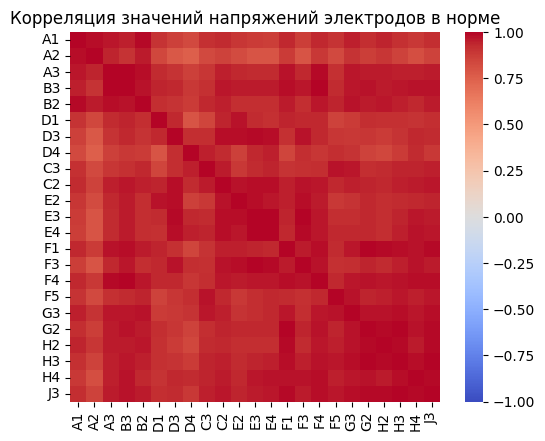

In [34]:
corr_mat_normal = data_normal.corr()

ax = plt.axes()
sns.heatmap(corr_mat_normal, square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm', ax=ax)

ax.set_title('Корреляция значений напряжений электродов в норме')
plt.show()

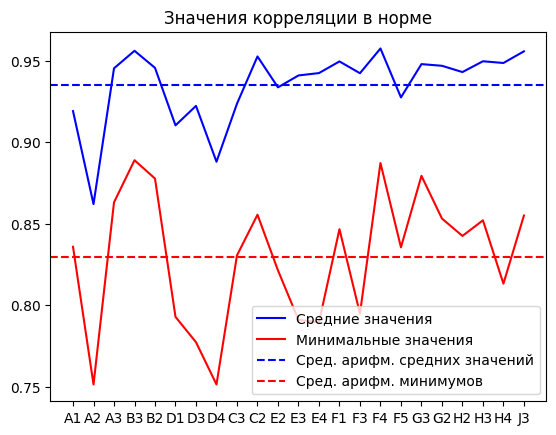

In [35]:
plt.plot(corr_mat_normal.mean(), color = "b", label="Средние значения")
plt.plot(corr_mat_normal.min(), color = "r", label="Минимальные значения")
plt.title("Значения корреляции в норме")
plt.axhline(y = np.average(corr_mat_normal.mean()), color="b", linestyle = '--', label="Сред. арифм. средних значений")
plt.axhline(y = np.average(corr_mat_normal.min()), color="r", linestyle = '--', label="Сред. арифм. минимумов")
plt.legend(loc='lower right')
plt.show()

In [36]:
print(
    corr_mat_normal.mean().min(),
    corr_mat_normal.mean().max(),
    np.average(corr_mat_normal.mean()),
    corr_mat_normal.min().min(),
    corr_mat_normal.min().max(),
    np.average(corr_mat_normal.min())
)

0.8620059620368944 0.9575446801296132 0.9352787886350981 0.7512905835422212 0.8889631082765207 0.829793278667164


Корреляция нормы в среднем колеблется от ~0.86 до ~0.96, среднее значение - ~0.94. <br/>
Минимальные значения колеблются от ~0.75 до ~0.89 и в среднем составляют ~0.83.

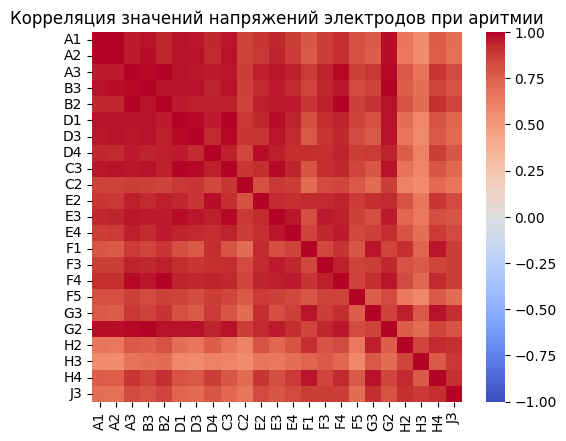

In [37]:
corr_mat_arrhythmia = data_arrhythmia.corr()

ax = plt.axes()
sns.heatmap(corr_mat_arrhythmia, square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm', ax=ax)

ax.set_title('Корреляция значений напряжений электродов при аритмии')
plt.show()

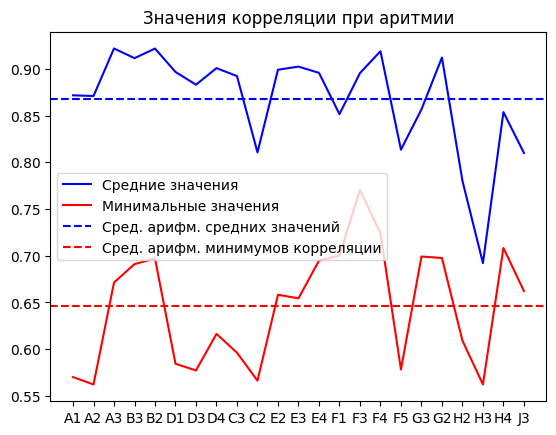

In [38]:
plt.plot(corr_mat_arrhythmia.mean(), color = "b", label="Средние значения")
plt.plot(corr_mat_arrhythmia.min(), color = "r", label="Минимальные значения")
plt.title("Значения корреляции при аритмии")
plt.axhline(y = np.average(corr_mat_arrhythmia.mean()), color="b", linestyle = '--', label="Сред. арифм. средних значений")
plt.axhline(y = np.average(corr_mat_arrhythmia.min()), color="r", linestyle = '--', label="Сред. арифм. минимумов корреляции")
plt.legend(loc='center left')
plt.show()

In [39]:
print(
    corr_mat_arrhythmia.mean().min(),
    corr_mat_arrhythmia.mean().max(),
    np.average(corr_mat_arrhythmia.mean()),
    corr_mat_arrhythmia.min().min(),
    corr_mat_arrhythmia.min().max(),
    np.average(corr_mat_arrhythmia.min())
)

0.6921111614740224 0.9219106492058616 0.8679992155873105 0.5621258417774124 0.770368965285746 0.6456699751317408


Корреляция аритмии в среднем колеблется от ~0.69 до ~0.92, среднее значение - ~0.87. <br/>
Минимальные значения колеблются от ~0.56 до ~0.77 и в среднем составляют ~0.65.

Таким образом, корреляция значений напряжений по электродам при аритмии в среднем на 0.07 единиц или 8% меньше, чем в норме, и на 0.18 единиц или 28% меньше по минимальным значениям.

## Анализ длин интервалов RR и значений напряжений пиков R

Обычно на ЭКГ можно выделить 5 зубцов: P, Q, R, S, T. Иногда можно увидеть малозаметную волну U. Зубец P отображает процесс деполяризации миокарда предсердий, комплекс QRS — деполяризации желудочков, сегмент ST и зубец T отражают процессы реполяризации миокарда желудочков. <br/>
Искать аритмию будем по зубцу <b>R</b> и интервалу <b>R-R</b>. Правильный ритм - <b>одинаковые R-R±10% от среднего R-R, соседние R-R отличаются менее, чем на 0,12с</b>.

<img src="ecg-complex-rus.jpg">

Представим данные в виде графиков:

[Text(0.5, 0, 'Время, миллисекунды'),
 Text(0, 0.5, 'Напряжение, микровольты'),
 Text(0.5, 1.0, 'Показания всех электродов в норме')]

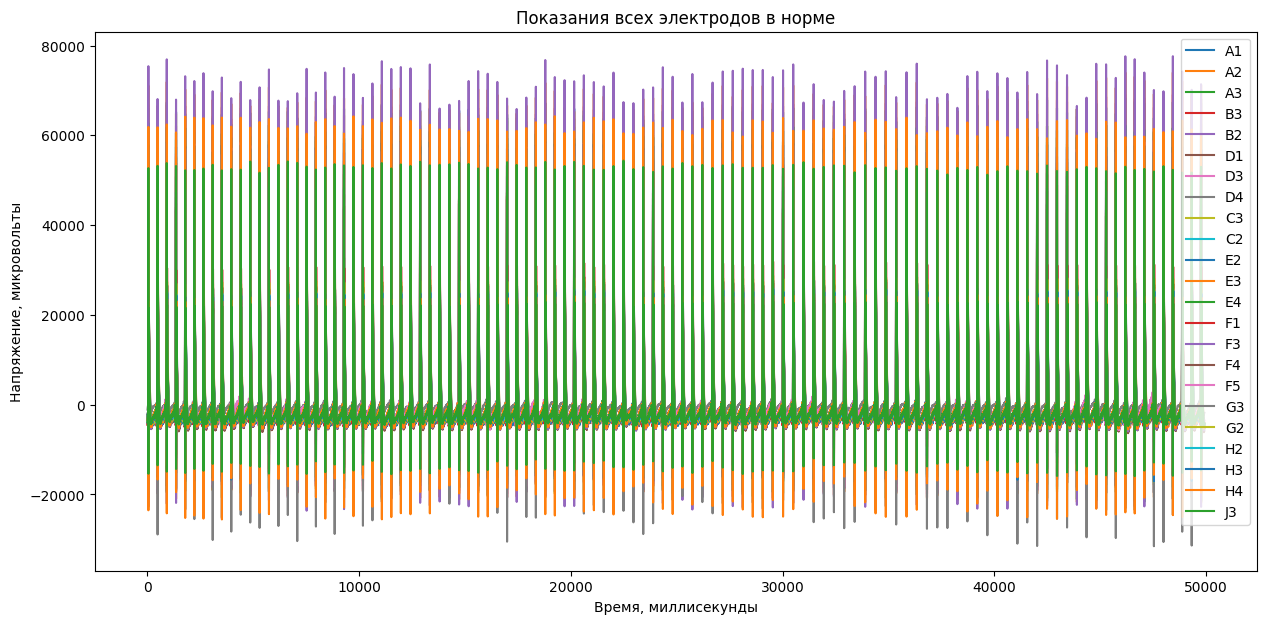

In [40]:
data_normal.plot(figsize=(15,7)).set(xlabel="Время, миллисекунды", ylabel="Напряжение, микровольты", title="Показания всех электродов в норме")

[Text(0.5, 0, 'Время, миллисекунды'),
 Text(0, 0.5, 'Напряжение, микровольты'),
 Text(0.5, 1.0, 'Показания всех электродов при аритмии')]

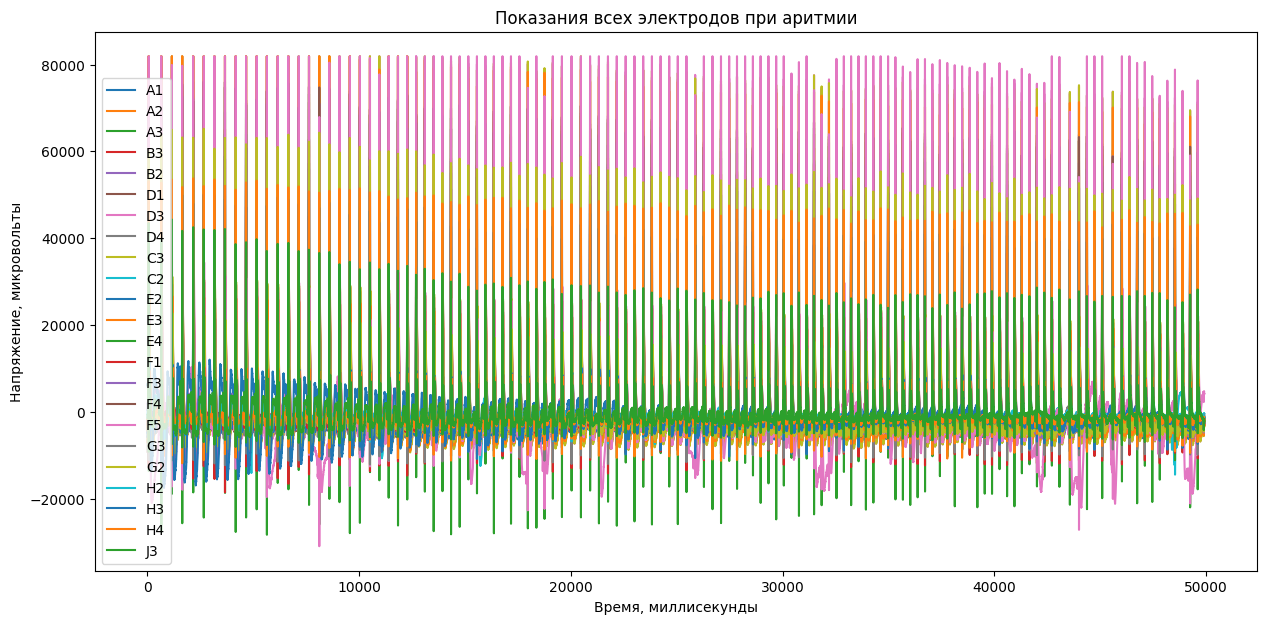

In [41]:
data_arrhythmia.plot(figsize=(15,7)).set(xlabel="Время, миллисекунды", ylabel="Напряжение, микровольты", title="Показания всех электродов при аритмии")

Чтобы выделить все зубцы R, воспользуемся функцией обнаружения пиков <i>find_peaks</i>.

In [42]:
data_normal.columns

Index(['A1', 'A2', 'A3', 'B3', 'B2', 'D1', 'D3', 'D4', 'C3', 'C2', 'E2', 'E3',
       'E4', 'F1', 'F3', 'F4', 'F5', 'G3', 'G2', 'H2', 'H3', 'H4', 'J3'],
      dtype='object')

Данный код является вспомогательным для обнаружения пиков на отдельных участках графика.

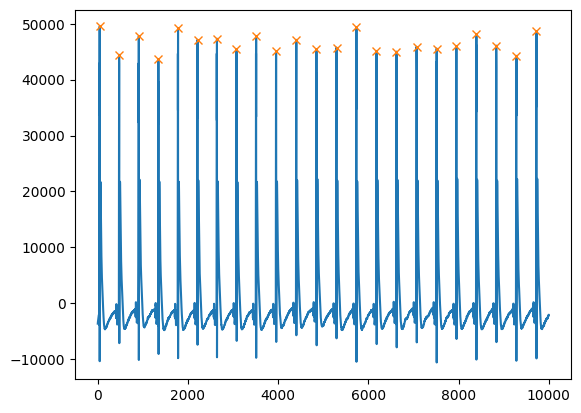

In [43]:
# # data_normal.head(1500)[['A1', 'B2']].plot(figsize=(15,10)).set(xlabel="t", ylabel="V")

from scipy.signal import find_peaks

col = data_normal.columns[22]
col = 'B3'
#l = len(data_normal[col])
l = 10000
threshold = 5000

x, _ = find_peaks(data_normal.head(l)[col], height=threshold, distance=300)

plt.plot(data_normal.head(l)[col])
plt.plot(x, data_normal.head(l)[col][x], "x")
plt.show()

In [44]:
# col = data_arrhythmia.columns[14]
# col = 'C2'
# l = len(data_normal[col])
# #l = 5000
# threshold = 7000

# x, _ = find_peaks(data_arrhythmia.head(l)[col], height=threshold, distance=300)

# plt.plot(data_arrhythmia.head(l)[col])
# # plt.plot(48528, data_arrhythmia.tail(l)[col][48528], "x")
# plt.plot(x, data_arrhythmia.head(l)[col][x], "x")
# plt.xlabel('t')
# plt.ylabel('mV')
# plt.show()

Находим зубцы R для всех электродов в норме, выставляем минимальную дистанцию между пиками = 300:

In [45]:
# data_normal.head(1500)[['A1', 'B2']].plot(figsize=(15,10)).set(xlabel="t", ylabel="V")

peaks_normal = []

for col in data_normal.columns:
    l = len(data_normal[col])
    # l = 2000
    threshold = 5000

    x, _ = find_peaks(data_normal.head(l)[col], height=threshold, distance=300)
    peaks_normal.append(x)

# plt.plot(data_normal.head(l)[col])
# plt.plot(peaks_normal, data_normal.head(l)[col][peaks_normal], "x")
# plt.show()

Функцией np.nanmean находим среднее значение и выставляем зону маскимального расхождения в 10% выше и ниже неё. Отрисовываем все пики. Функцией plt.errorbar ищем интервалы, которые отличаются от соседей больше, чем на 120 миллисекунд.

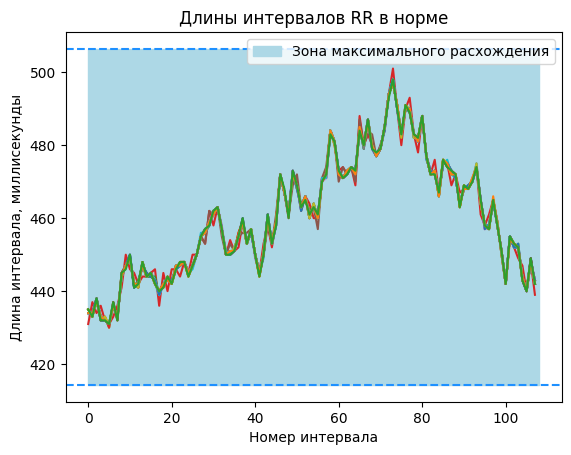

In [46]:
intervals_normal = []

for col in range(0, len(data_normal.columns)):
    t = []
    for x in range(0, len(peaks_normal[col]) - 1):
        t.append(peaks_normal[col][x + 1] - peaks_normal[col][x])
    plt.plot(t)
    intervals_normal.append(t)

for i in range(len(intervals_normal[0]) - 1):
    # print(abs(intervals_normal[0][i] - intervals_normal[0][i + 1]))
    if abs(intervals_normal[0][i] - intervals_normal[0][i + 1]) >= 120:
        plt.errorbar(i, intervals_normal[0][i], yerr=120, label = "Скачок")

lower_normal = np.nanmean(intervals_normal[0]) - np.nanmean(intervals_normal[0]) * 0.1
upper_normal = np.nanmean(intervals_normal[0]) + np.nanmean(intervals_normal[0]) * 0.1
plt.axhline(y=lower_normal, color='dodgerblue', linestyle='--')
plt.axhline(y=upper_normal, color='dodgerblue', linestyle='--')
plt.fill_between([0, len(intervals_normal[0])], lower_normal, upper_normal, color="lightblue", label = "Зона максимального расхождения")

# plt.plot(intervals_normal)
plt.title('Длины интервалов RR в норме')
plt.xlabel('Номер интервала')
plt.ylabel('Длина интервала, миллисекунды')
plt.legend()
plt.show()

Как можно увидеть, 23 графика зубцов R в каждом зубце имеют примерно одинаковое значение и образуют одинаковую фигуру. Все длины интервалов в норме находятся в пределах от 420 до 500, не отличаются друг от друга больше чем на 120 миллисекунд и не выходят из зоны расхождения от среднего значения. Функция plt.errorbar не нашла никаких скачков.

Находим пики R для всех электродов при аритмии:

In [47]:
# data_arrhythmia.head(1800)[['A1', 'B2']].plot(figsize=(15,10)).set(xlabel="t", ylabel="V")

peaks_arrhythmia = []

for col in data_arrhythmia.columns:
    l = len(data_arrhythmia[col])
    # l = 2000
    threshold = 7000

    x, _ = find_peaks(data_arrhythmia.head(l)[col], height=threshold, distance=300)
    peaks_arrhythmia.append(x)


# plt.plot(data_arrhythmia.head(l)[col])
# plt.plot(peaks_arrhythmia, data_arrhythmia.head(l)[col][peaks_arrhythmia], "x")
# plt.show()

В цикле ищем такие интервалы, которые отличаются от соседних больше чем на 120 миллисекунд. Выделяем их функцией plt.errorbar.

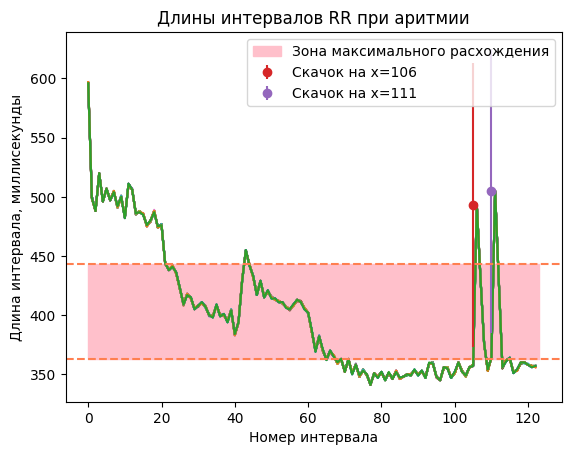

In [48]:
intervals_arrhythmia = []

for col in range(0, len(data_normal.columns)):
    t = []
    for x in range(0, len(peaks_arrhythmia[col]) - 1):
        t.append(peaks_arrhythmia[col][x + 1] - peaks_arrhythmia[col][x])
    plt.plot(t)
    intervals_arrhythmia.append(t)
 
for i in range(len(intervals_arrhythmia[0]) - 1):
    # print(abs(intervals_arrhythmia[0][i] - intervals_arrhythmia[0][i + 1]))
    if abs(intervals_arrhythmia[0][i] - intervals_arrhythmia[0][i + 1]) >= 120:
        plt.errorbar(i, intervals_arrhythmia[0][i + 1], yerr=120, label = "Скачок на x=" + str(i + 1), fmt='o')

lower_arrhythmia = np.nanmean(intervals_arrhythmia[0]) - np.nanmean(intervals_arrhythmia[0]) * 0.1
upper_arrhythmia = np.nanmean(intervals_arrhythmia[0]) + np.nanmean(intervals_arrhythmia[0]) * 0.1
plt.axhline(y=lower_arrhythmia, color='coral', linestyle='--')
plt.axhline(y=upper_arrhythmia, color='coral', linestyle='--')
plt.fill_between([0, len(intervals_arrhythmia[0])], lower_arrhythmia, upper_arrhythmia, color="pink", label = "Зона максимального расхождения")

# plt.plot(intervals_normal)
plt.title('Длины интервалов RR при аритмии')
plt.xlabel('Номер интервала')
plt.ylabel('Длина интервала, миллисекунды')
plt.legend()
plt.show()

Находим процент области графика, который выходит за пределы зоны максимального расхождения:

In [57]:
count = 0
full = len(intervals_arrhythmia[0])
for x in intervals_arrhythmia[0]:
    if x > upper_arrhythmia:
        count+=1
    if x < lower_arrhythmia:
        count+=1
print(count / full)

0.5772357723577236


Как мы видим, график выходит из зоны максимального расхождения больше, чем на 100 миллисекунд, и нашлись два интервала, которые отличаются от соседних более, чем на 120 миллисекунд в точках 106 и 111. 58% области графика выходит из зоны максимального расхождения.

Отобразим оба графика в одном для наглядности:

111
106


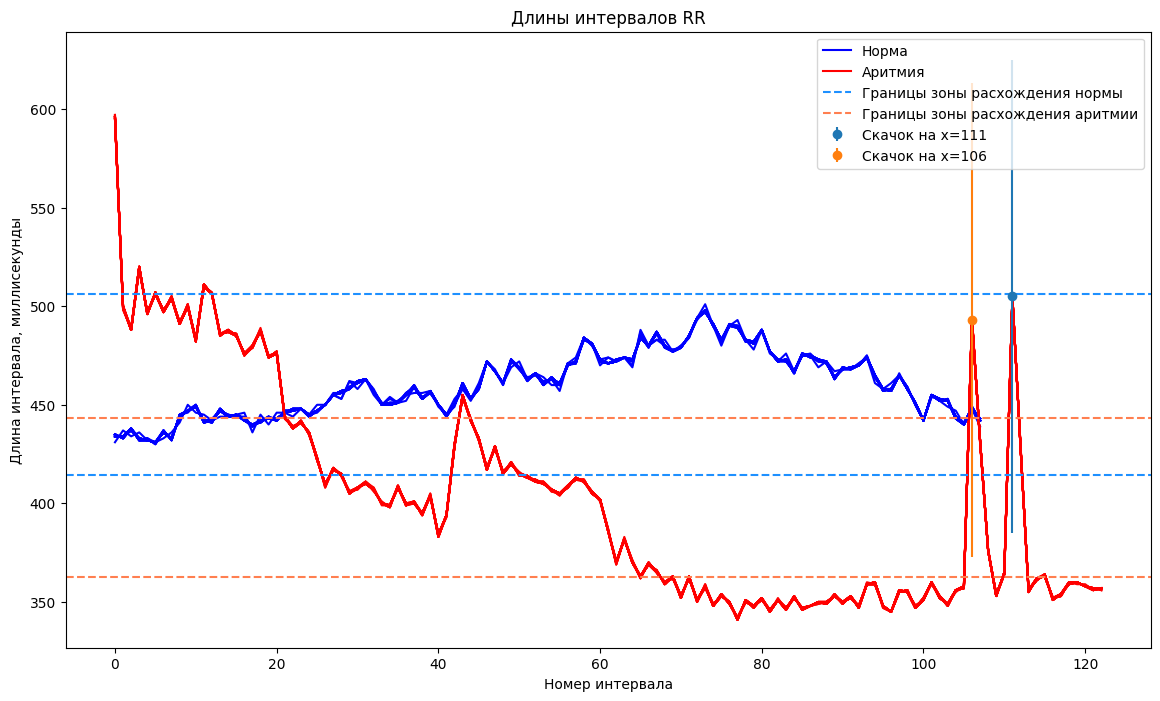

In [49]:
from matplotlib.pyplot import figure
figure(figsize=(14, 8))

for col in range(0, len(data_normal.columns) - 1):
    plt.plot(intervals_normal[col], color="blue")
    plt.plot(intervals_arrhythmia[col], color = "red")

plt.plot(intervals_normal[22], color="blue", label="Норма")
plt.plot(intervals_arrhythmia[22], color = "red", label="Аритмия")

plt.title('Длины интервалов RR')
plt.xlabel('Номер интервала')
plt.ylabel('Длина интервала, миллисекунды')

lower_normal = np.nanmean(intervals_normal[0]) - np.nanmean(intervals_normal[0]) * 0.1
upper_normal = np.nanmean(intervals_normal[0]) + np.nanmean(intervals_normal[0]) * 0.1
plt.axhline(y=lower_normal, color='dodgerblue', linestyle='--', label = "Границы зоны расхождения нормы")
plt.axhline(y=upper_normal, color='dodgerblue', linestyle='--')
# plt.fill_between([0, len(intervals_arrhythmia[0])], lower_normal, upper_normal, color="lightblue")

lower_arrhythmia = np.nanmean(intervals_arrhythmia[0]) - np.nanmean(intervals_arrhythmia[0]) * 0.1
upper_arrhythmia = np.nanmean(intervals_arrhythmia[0]) + np.nanmean(intervals_arrhythmia[0]) * 0.1
plt.axhline(y=lower_arrhythmia, color='coral', linestyle='--', label = "Границы зоны расхождения аритмии")
plt.axhline(y=upper_arrhythmia, color='coral', linestyle='--')
# plt.fill_between([0, len(intervals_arrhythmia[0])], lower_arrhythmia, upper_arrhythmia, color="pink")

for i in range(len(intervals_arrhythmia[0]) - 1, 0, -1):
    if abs(intervals_arrhythmia[0][i] - intervals_arrhythmia[0][i - 1]) >= 120:
        plt.errorbar(i, intervals_arrhythmia[0][i], yerr=120, label = "Скачок на x=" + str(i), fmt='o')
        print(i)

plt.legend(loc='best')
plt.show()

Таким образом, в графике с аритмией виден выход из зоны максимального расхождения и два интервала, которые имеют расхождение, больше чем на 120 миллисекунд с соседним в точках 106 и 111.

## Статистический анализ

Выполним статистический анализ данных о длинах интервалов R-R, и заодно взглянем на напряжения зубцов R. Для выполнения анализа будем находить и сравнивать <b>cреднеквадратическое отклонение</b>. <br/>
В теории вероятностей и статистике среднеквадратическое отклонение — наиболее распространённый показатель рассеивания значений случайной величины относительно её математического ожидания (аналога среднего арифметического с бесконечным числом исходов). <br/>
Среднеквадратическое отклонение определяется как квадратный корень из дисперсии случайной величины: <br/>
$\sigma = \sqrt{D[X]}$ <br/>
Большее значение среднеквадратического отклонения показывает больший разброс значений в представленном множестве со средней величиной множества; меньшее значение, соответственно, показывает, что значения в множестве сгруппированы вокруг среднего значения. <br/>

Например, у нас есть три числовых множества: {0, 0, 14, 14}, {0, 6, 8, 14} и {6, 6, 8, 8}. У всех трёх множеств средние значения равны 7, а среднеквадратические отклонения, соответственно, равны 7, 5 и 1. У последнего множества среднеквадратическое отклонение маленькое, так как значения в множестве сгруппированы вокруг среднего значения; у первого множества самое большое значение среднеквадратического отклонения — значения внутри множества сильно расходятся со средним значением. <br/>

В общем смысле среднеквадратическое отклонение можно считать мерой неопределённости. Оно показывает непредсказуемость поведения исследуемого процесса. <br/>

В наших данных будем искать среднеквадратическое отклонение длин интервалов и значений напряжений в пиках.

Отобразим отклонение по длинам интервалов. Воспользуемся функций <i>np.std</i> для нахождения отклонения по каждому электроду, и выведем все данные друг рядом с другом в столбцах:

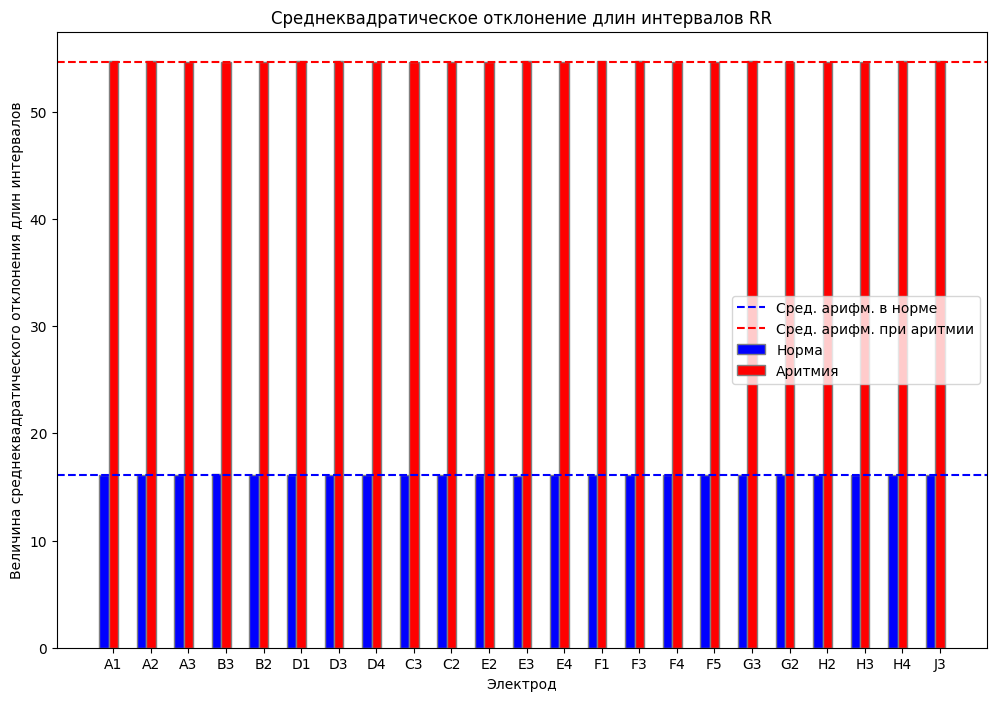

In [50]:
std_intervals = [[], []]

for i in range(23):
    std_intervals[0].append(np.std(intervals_normal[i]))
    std_intervals[1].append(np.std(intervals_arrhythmia[i]))

std_intervals

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# Set position of bar on X axis
br1 = np.arange(len(std_intervals[0]))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, std_intervals[0], color ='b', width = barWidth,
        edgecolor ='grey', label ='Норма')
plt.bar(br2, std_intervals[1], color ='r', width = barWidth,
        edgecolor ='grey', label ='Аритмия')
 
# Adding Xticks
plt.title('Среднеквадратическое отклонение длин интервалов RR')
plt.xlabel('Электрод')
plt.ylabel('Величина среднеквадратического отклонения длин интервалов')
plt.xticks([r + barWidth for r in range(len(std_intervals[0]))],
        ['A1', 'A2', 'A3', 'B3', 'B2', 'D1', 'D3', 'D4', 'C3', 'C2', 'E2', 'E3',
       'E4', 'F1', 'F3', 'F4', 'F5', 'G3', 'G2', 'H2', 'H3', 'H4', 'J3'])
plt.axhline(y = np.average(std_intervals[0]), color = 'b', linestyle = '--', label="Сред. арифм. в норме")
plt.axhline(y = np.average(std_intervals[1]), color = 'r', linestyle = '--', label="Сред. арифм. при аритмии")
plt.legend()
plt.show()

In [51]:
print(
    np.average(std_intervals[0]),
    np.average(std_intervals[1])
)

16.094909206748007 54.690169298166346


Среднее значение отклонения по всем электродам в норме составляет ~16 единиц, при аритмии - ~55 единиц, что на 39 единиц или 244% больше.

Отобразим графики напряжений электродов в R зубцах:

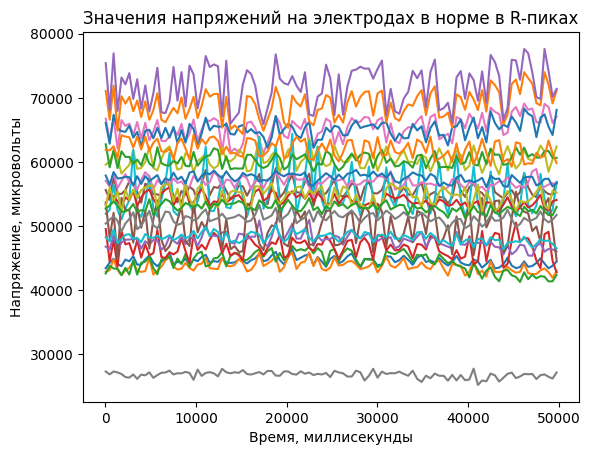

In [52]:
peaks_voltage_normal = []
for col in range(0, len(data_normal.columns)):
    plt.plot(peaks_normal[col], data_normal[data_normal.columns[col]][peaks_normal[col]])
    peaks_voltage_normal.append(data_normal[data_normal.columns[col]][peaks_normal[col]])
plt.title('Значения напряжений на электродах в норме в R-пиках')
plt.xlabel('Время, миллисекунды')
plt.ylabel('Напряжение, микровольты')
plt.show()

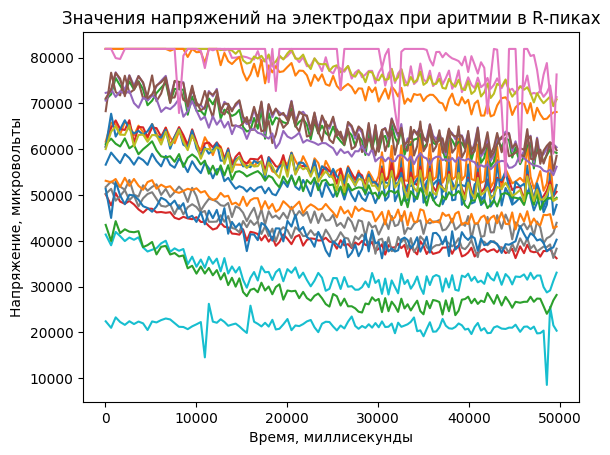

In [53]:
peaks_voltage_arrhythmia = []
for col in range(0, len(data_normal.columns)):
    plt.plot(peaks_arrhythmia[col], data_arrhythmia[data_normal.columns[col]][peaks_arrhythmia[col]])
    peaks_voltage_arrhythmia.append(data_arrhythmia[data_normal.columns[col]][peaks_arrhythmia[col]])
plt.title('Значения напряжений на электродах при аритмии в R-пиках')
plt.xlabel('Время, миллисекунды')
plt.ylabel('Напряжение, микровольты')
plt.show()

Вычислим среднеквадратичное отклонение:

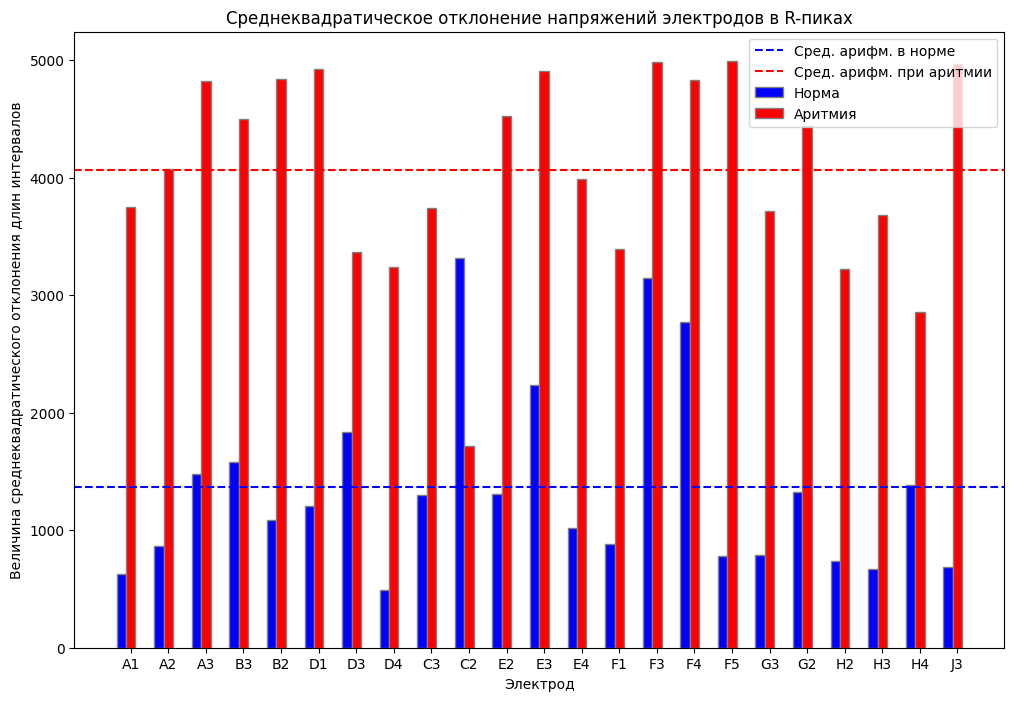

In [54]:
std_peaks_voltage = [[], []]

for i in range(23):
    std_peaks_voltage[0].append(np.std(list(peaks_voltage_normal[i])))
    std_peaks_voltage[1].append(np.std(list(peaks_voltage_arrhythmia[i])))

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# Set position of bar on X axis
br1 = np.arange(len(std_peaks_voltage[0]))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, std_peaks_voltage[0], color ='b', width = barWidth,
        edgecolor ='grey', label ='Норма')
plt.bar(br2, std_peaks_voltage[1], color ='r', width = barWidth,
        edgecolor ='grey', label ='Аритмия')
 
# Adding Xticks
plt.title('Среднеквадратическое отклонение напряжений электродов в R-пиках')
plt.xlabel('Электрод')
plt.ylabel('Величина среднеквадратического отклонения длин интервалов')
plt.xticks([r + barWidth for r in range(len(std_peaks_voltage[0]))],
        ['A1', 'A2', 'A3', 'B3', 'B2', 'D1', 'D3', 'D4', 'C3', 'C2', 'E2', 'E3',
       'E4', 'F1', 'F3', 'F4', 'F5', 'G3', 'G2', 'H2', 'H3', 'H4', 'J3'])
plt.axhline(y = np.average(std_peaks_voltage[0]), color = 'b', linestyle = '--', label="Сред. арифм. в норме")
plt.axhline(y = np.average(std_peaks_voltage[1]), color = 'r', linestyle = '--', label="Сред. арифм. при аритмии")
plt.legend()
plt.show()

In [55]:
print(
    np.average(std_peaks_voltage[0]),
    np.average(std_peaks_voltage[1])
)

1370.2908960944353 4064.5511863327556


Среднее значение отклонения по всем электродам в норме составляет ~1370 единиц, при аритмии - ~4065 единиц, что на 2695 единиц или 196% больше.

Получается, среднеквадратическое отклонение данных при аритмии гораздо выше, чем в норме. Это говорит о большей непредсказуемости ритма сердца, что как раз и свидетельствует об аритмии.

## Выводы

Таким образом, мы получили результаты, которые точно свидетельствуют о наличии аритмии:
- Выход графика длин интервалов R-R за пределы зоны максимального расхождения в 10% от среднего значения в 58% всей области;
- Два интервала, которые отличаются от соседей более, чем на 120 миллисекунд.

Также мы провели статистический анализ и выяснили, что при аритмии:
- Незначительно понижается корреляция значений напряжений по электродам: на 8% по среднему значению и на 28% по минимальному;
- Значительно повышается среднеквадратическое отклонение по длинам интервалов R-R - на 196%, и по значениям напряжений электродов - на 244%.